# Actividades Lección 4: Fundamentos de Big Data

# Actividad 1

Comenzamos importando las principales dependencias

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el Dataset contenido en train.csv y mostramos sus 5 primeras filas

In [109]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


La columna "PassengerId" no nos aporta información relevante y por tanto la eliminamos.

In [110]:
df = df.drop('PassengerId', axis = 1)

Procedemos a hacer un análisis exploratorio del Dataset, para ello, vamos a comenzar obteniendo la longitud del dataset (cantidad de datos), su forma (con df.shape) y vamos a usar describe() para obtener rápidamente algunas cantidades estadísticas con respecto al mismo.

In [111]:
len(df)

891

In [112]:
df.shape

(891, 11)

In [113]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


De aquí podemos ver que existen columnas con valores que faltan
("missing values"), vamos a tratar de buscarlos.

In [114]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

De esto último vemos lo siguiente:

- La columna Age tiene 177 valores nulos.
- La columna Cabin tiene 687 valores nulos.
- La columna Embarked tiene 2 valores nulos.

In [115]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Vamos a pasar ahora a exaimar el número de supervivientes. Como hemos visto inicialmente un 0 en dicha columna indica que el tripulante no sobrevivió, y un 1 indica exactamente lo contrario.

In [117]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

De esto último podemos ver que de los 891 tripulantes, 549 fallecieron y 342 pudieron sobrevivir. Vamos a visualizarlo con un diagrama de barras.

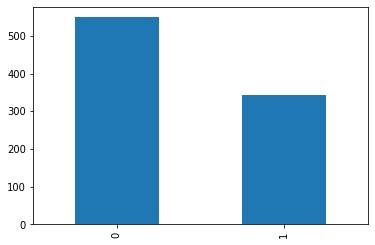

In [118]:
df.Survived.value_counts().plot(kind = "bar")
plt.show()

Si qusiésemos seleccionar una columna concreta de nuestro Dataframe,
existen dos formas de hacerlo

In [119]:
df["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [120]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [121]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


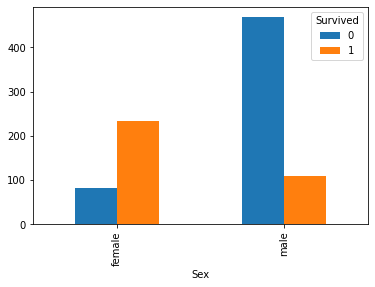

In [122]:
pd.crosstab(df.Sex, df.Survived).plot(kind = "bar")
plt.show()

Este gráfico nos permite concluir que la mortalidad entre los hombres
fue mucho más alta que en el caso de las mujeres. También podemos 
visualizarlo de la siguiente manera.

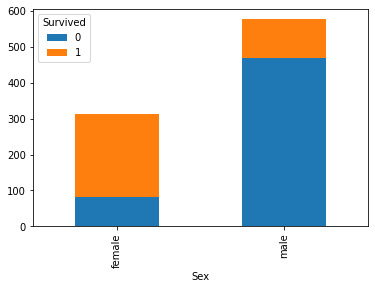

In [123]:
pd.crosstab(df.Sex, df.Survived).plot(kind = "bar", stacked = True)
plt.show()

Pasamos ahora a examinar la supervivencia de los pasajeros en función de la clase a la que pertenezcan. El atributo PClass puede tener tres valores (1,2 o 3) que indican lo siguiente:

- 1º Clase: Supuestamente las familias más adineradas.
- 2º Clase: Nivel intermedio.
- 3º Clase: Clase de las familias más humildes.

Podemos usar crosstab para obtener la información que buscamos.

In [124]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


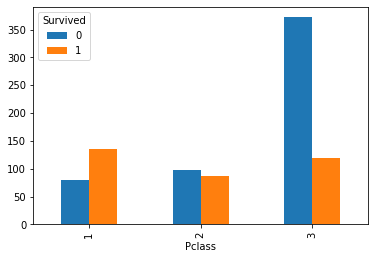

In [125]:
pd.crosstab(df.Pclass, df.Survived).plot(kind = "bar")
plt.show()

De esta gráfica deducimos que la mayoría de personas en la 3º clase no sobrevivió. Podemos usar groupby también para obtener información adicional del problema.

In [126]:
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

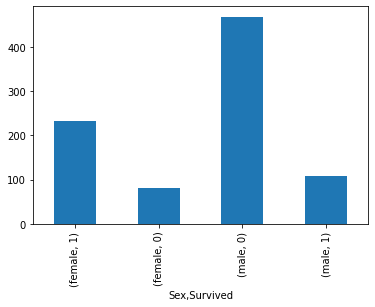

In [127]:
df.groupby("Sex").Survived.value_counts().plot(kind = "bar")
plt.show()

Vemos que esta aproximación también nos permite visualizar rápidamente 
la cantidad de supervivientes entre hombres y mujeres y extraer las 
mismas conclusiones. Algo que también puede resultar útil puede ser extraer cierta información de un Dataframe y guardarlo en otro. A continuación, vamos a guardar en un nuevo Dataframe la información de aquellas personas que pertenecen a 1º Clase.

In [128]:
df_prim_clase = df[df.Pclass == 1]
df_prim_clase.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


Esta extracción puede refinarse todavía más y de entre todas las columnas, quedarnos únicamente con la que muestre los datos de supervivencia.

In [129]:
df_prim_clase_sur = df[df.Pclass == 1]["Survived"]
df_prim_clase_sur.head()

1     1
3     1
6     0
11    1
23    1
Name: Survived, dtype: int64

Vamos a seguir este mismo nuevo método de extracción para generar algunos DataFrames nuevos.

In [130]:
# DataFrame con todos los supervivientes
df_sup = df[df.Survived == 1]
# DataFrame con todos los NO supervivientes
df_no_sup = df[df.Survived == 0]
# DataFrame con todos los hombres que sobreviven
df_male_sup = df[(df.Survived == 1) & (df.Sex == "male")]
# DataFrame con todas las mujeres que sobreviven
df_female_sup = df[(df.Survived == 1) & (df.Sex == "female")]
# DataFrame con todos los hombres que NO sobreviven
df_male_no_sup = df[(df.Survived == 0) & (df.Sex == "male")]
# DataFrame con todos las las mujeres que NO sobreviven
df_female_no_sup = df[(df.Survived == 0) & (df.Sex == "female")]

In [131]:
df_sup.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [132]:
df_no_sup.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [133]:
df_female_sup.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [134]:
df_male_sup.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,NaN,S
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5,A6,S


In [135]:
df_male_no_sup.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [136]:
df_female_no_sup.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S


Vamos a comenzar a dibujar algunas gráficas

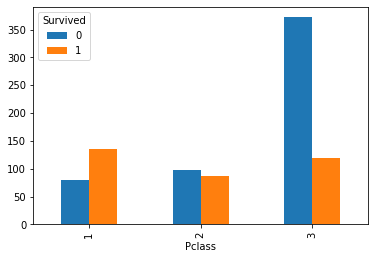

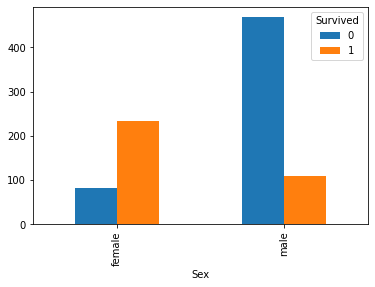

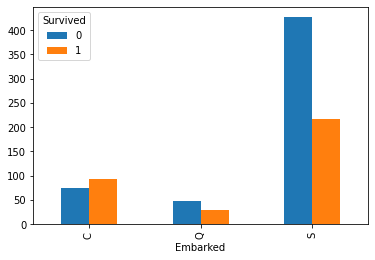

In [137]:
opciones = ["Pclass", "Sex", "Embarked"]
for opcion in opciones:
    pd.crosstab(df[opcion], df.Survived).plot(kind = "bar")
    plt.show()

A continuación, vamos a usar Seaborn para dibujar algunas de las 
gráficas que pueden resultar interesantes.

C:\Users\kmart\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kmart\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


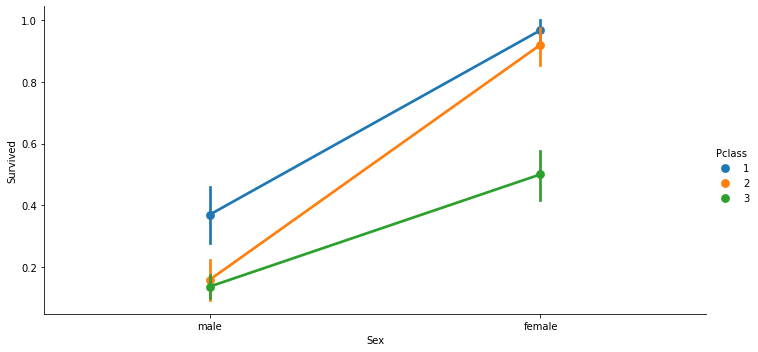

In [138]:
sns.factorplot("Sex", "Survived", hue = 'Pclass', aspect = 2, 
               legend = True, data = df)
plt.show()

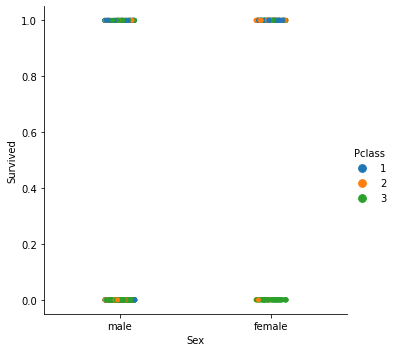

In [139]:
sns.catplot(x = 'Sex', y = 'Survived', hue = 'Pclass', kind = 'strip',
           data = df)
plt.show()

C:\Users\kmart\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


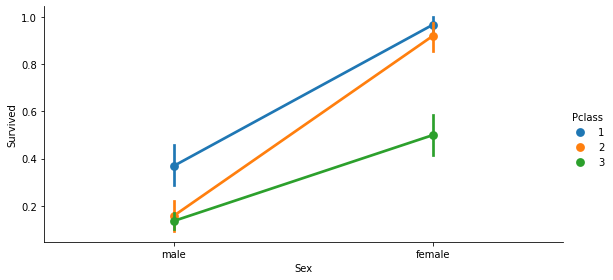

In [140]:
sns.factorplot(x = "Sex", y = "Survived", hue = 'Pclass', kind = 'point', 
               height = 4, aspect = 2, legend = True, data = df)
plt.show()

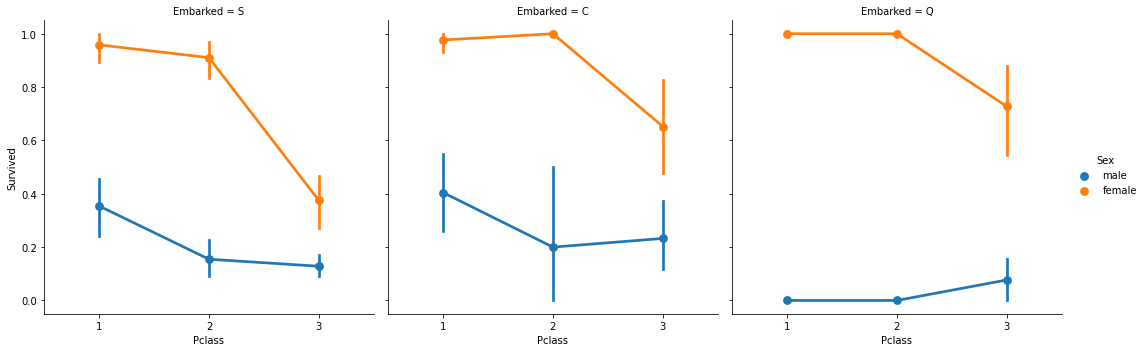

In [141]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', 
            col = 'Embarked', kind = 'point', data = df)
plt.show()

De todas estas gráficas podemos extraer varias conclusiones:

1.- Las mujeres de clase 3 que embaracon en S fallecieron muchas en comparación con la 1 y 2 clase.

2.- Los hombres con mayor porcentaje de supervivencia embarcaron en C.

3.- Los hombres con menor porcentaje de supervivencia embarcaron en Q.

4.- Vemos nuevamente como la mayoría de mujeres sobrevivió, pero no los hombres.

Vamos a continuacion a dibujar algunas gráficas en función de la edad

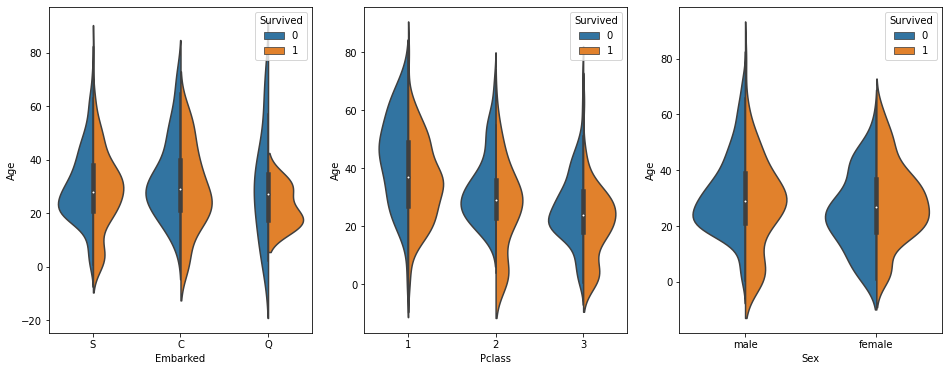

In [142]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 6)

sns.violinplot(x = 'Embarked', y = 'Age', hue = 'Survived',
              data = df, split = True, ax = ax[0])
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived',
              data = df, split = True, ax = ax[1])
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived',
              data = df, split = True, ax = ax[2])

plt.show()

Esto nos permite concluir varias cosas:

- Embarked y Age:
    - La gente de unos 18-35 años de Q sobreviven mayoritariamente
    - No hay porcentajes mayoritarios en las otras embarcadiones
    - En Q embarcaron bastantes niños que no sobrevivieron
- Pclass y Age:
    - De la 2ºClase principalmente y en la 3º sobreviven la mayoría de niños.
- Sex y Age:
    - Hay mas ancianos que ancianas.
    - Los jovenes (varón) menores de 20 años en general sobrevivieron pero no las mujeres.

In [143]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

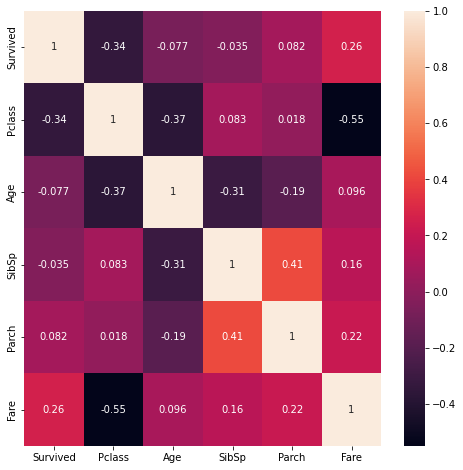

In [144]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

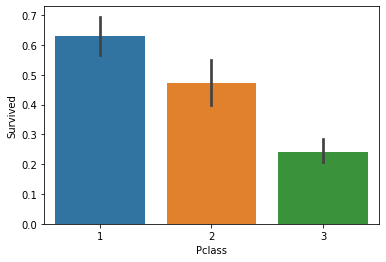

In [145]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.show()

In [146]:
def funcion_graficas(feat):
    plt.subplot(2,2,1)
    df.groupby(feat).Survived.value_counts().plot(kind = 'bar')
    plt.figure(figsize = (12, 8))
    sns.barplot(x = feat, y = 'Survived', data = df)
    plt.show()

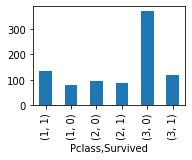

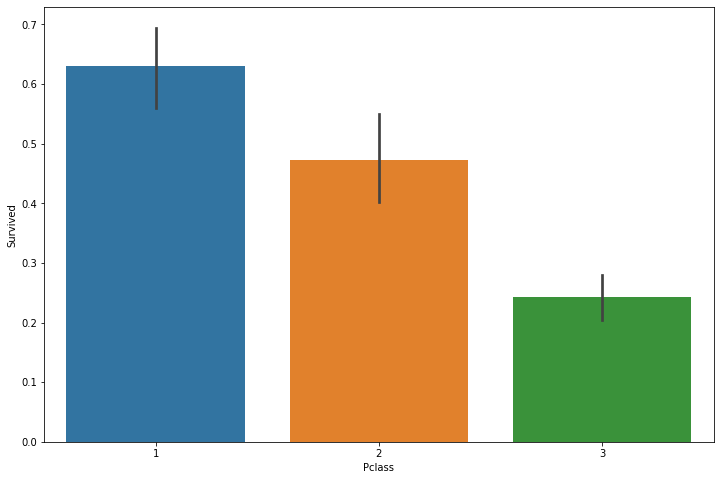

In [147]:
funcion_graficas("Pclass")

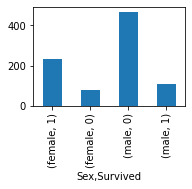

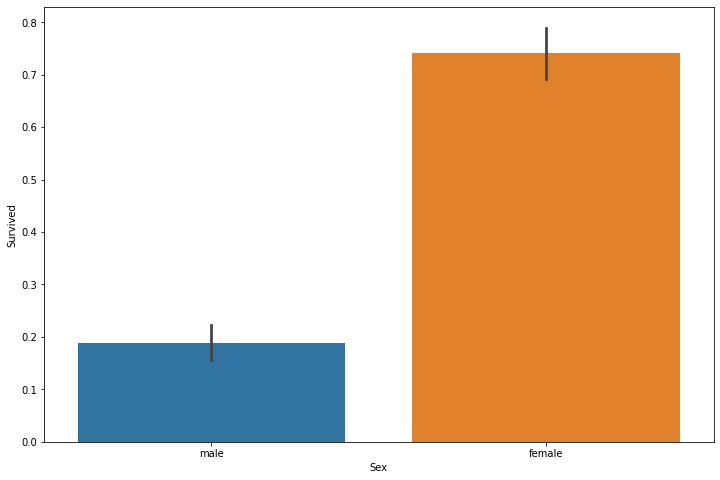

In [148]:
funcion_graficas("Sex")

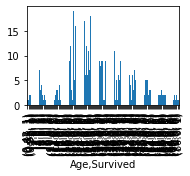

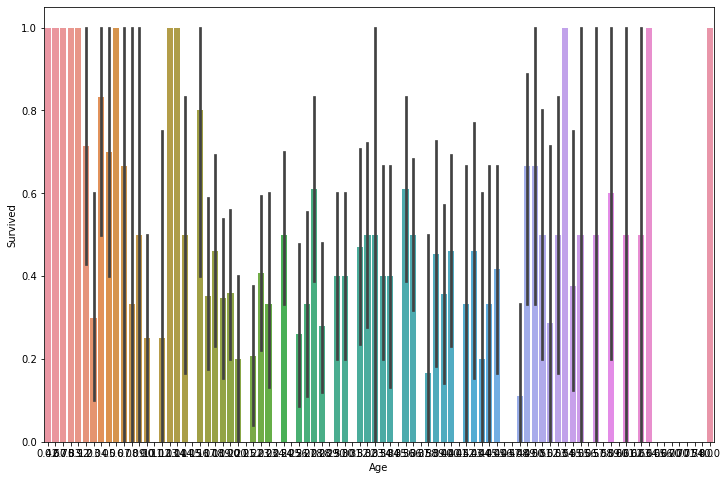

In [149]:
funcion_graficas("Age")

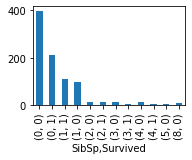

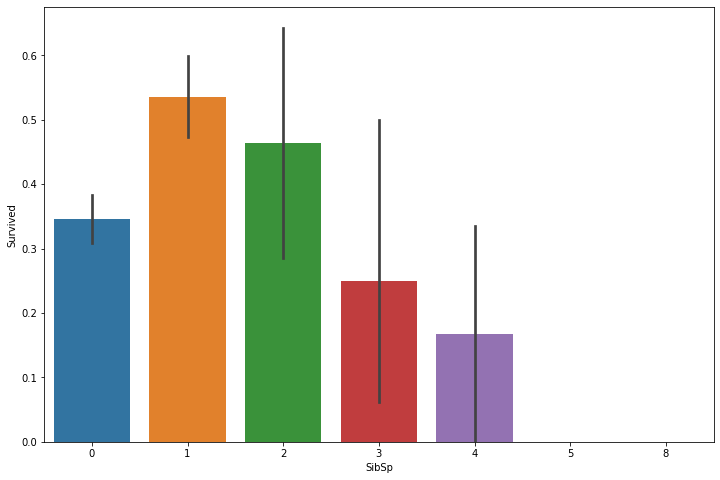

In [150]:
funcion_graficas("SibSp")

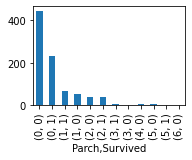

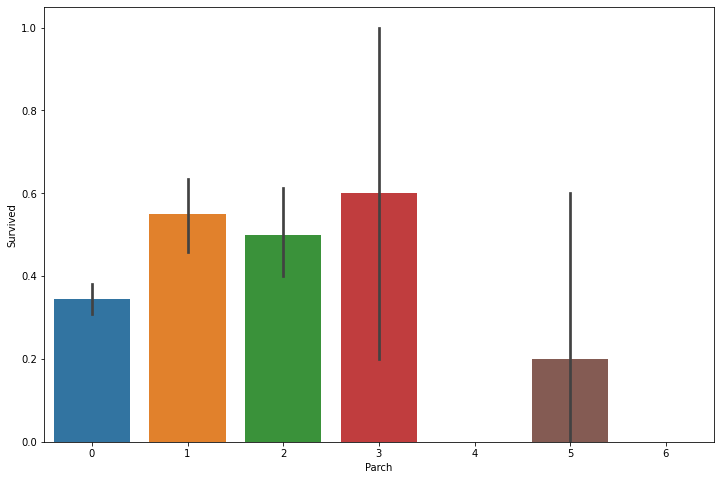

In [151]:
funcion_graficas("Parch")

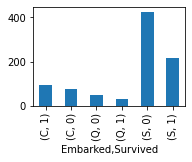

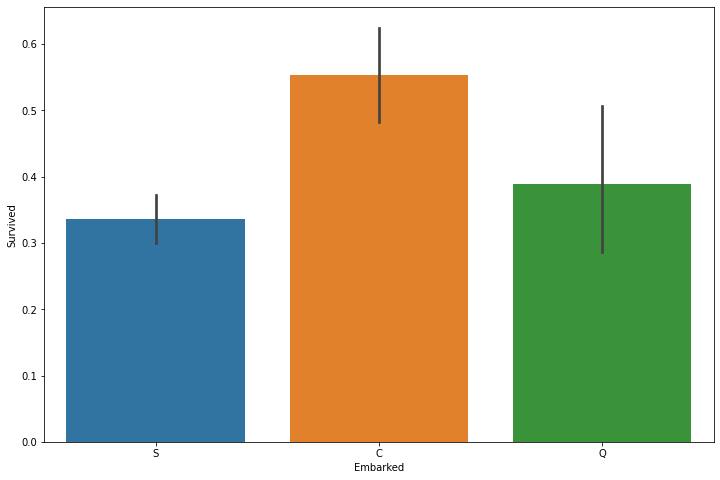

In [152]:
funcion_graficas("Embarked")

# ACTIVIDAD 2

Si estás trabajando con un set de datos, y necesitas ver rápidamente la información de una columna con un gráfico.
¿Qué librería usarías? ¿Por qué?

Si quieres puedes añadir un ejemplo. No es necesario, no obstante.

Si estamos trabajando con cierto set de datos, la forma más rápida de consultar alguna columna sería utilizando la librería Pandas. En el mundo de la ciencia de datos es habitual trabajar con datos almacenados en formato .csv o incluso Excel o JSON. Pandas nos ofrece la posibilidad de leer directamente ese tipo de datos y almacenarlos en memoria como un objeto de tipo pd.DataFrame. En un DataFrame resulta extremadamente sencillo acceder a la información de una columna (mediante le notaciñon ["columna"] similar a un diccionario, o mediante la notación .columna, similar al acceso a un métod en orientación a objetos), además de poder obtener estadísticas de dicha columna como conteo de objetos, máximo, mínimo, desviación etc.

Un ejemplo sería cargar el Iris Dataset mediante pandas y extraer información de alguna columna como mostramos a continuación.

In [153]:
df_iris = pd.read_csv('./iris.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


Aquí podemos ver el uso de read_csv() para cargar el DataFrame y de .head() para ver las primeras cinco filas. Podríamos extraer por ejemplo la información de la columna sepal_length como sigue

In [154]:
df_sepal = df_iris['sepal_length']
df_sepal.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

Y por ejemplo, utilizar el método .describe() para obtener una seríe de cantidades estadísticas interesantes.

In [155]:
df_sepal.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

# ACTIVIDAD 3

¿Te parece difícil la forma en que creamos “nuevos DataFrames”?
(seleccionando solo ciertas filas o columnas, bajo ciertas condiciones o
premisas).

Nota: Sobre esto hemos hablado en el punto 5 del Manual
(Esta parte será puntuada solamente por el mero hecho de responder a la
misma, independientemente de lo que se diga).

Se trata de yo saber lo que habéis avanzado.
Esta materia, o algo muy similar, probablemente se explique nuevamente en
asignaturas posteriores. (En Machine Learning, quizá).

Personalmente no me resulta complicado crear nuevos Dataframes a partir de alguno que ya existe. El hecho de utilizar condiciones para quedarnos con las columnas y filas que necesitemos me resulta intuitivo y es similar a las búsquedas en otras estrucutras de Python como las listas.

# ACTIVIDAD 4

Busca algo de información acerca de “Heatmap” y explica con tus palabras lo
que consideres oportuno.

Puedes añadir ejemplos o lo que quieras.

Un mapa de calor (heat map, en inglés) es una técnica de visualización de datos que mide la magnitud de un fenómeno en colores en dos dimensiones. La variación del color puede ser por tono o intensidad, haciendo obvia la lectura del fenómeno sobre el espacio que se trata.

Por ejemplo, en el Heatmap que hemos dibujado más arriba, se nos indica el grado de correlación entre cada "magnitud" o columna del Titanic DataFrame mediante una matriz 2D coloreada. Colores claros indican una correlación positiva entre las variables mientras que colores oscuros indican correlación negativa (es decir, si una variable crece la otra decrece). En la diagonal de la matriz los valores de correlación son 1 pues es la correlación de una variable con ella misma.

Podríamos de nuevo, aplicar el heatmap al Iris Datset y ver que obtenemos.

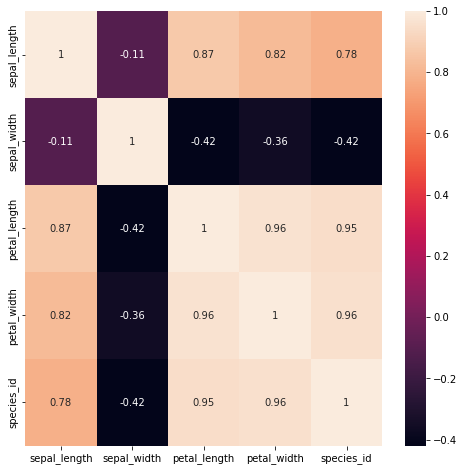

In [156]:
plt.figure(figsize = (8, 8))
sns.heatmap(df_iris.corr(), annot = True)
plt.show()

Aquí podriamos ver por ejemplo como todas las variables presentan una fuerte correlación positiva, excepto "sepal_width", que presenta correlación negativa con el resto de variables.

# ACTIVIDAD 5

Hemos usado diferentes tipos de gráficos.

¿Se entiende bien cuando usar un “violinplot” o un“factorplot” por ejemplo?
¿Serías capaz de emplearlo en otro set de datos?

(Esta parte de la actividad será puntuada solamente por el mero hecho de
ser respondida, independientemente de lo que se diga).

Recuerda que existen más tipos de Gráficos, no obstante, y lo más
importante es la “extracción de información” de los mismos.

Un violinplot nos permite de forma rápida visualizar la distribución de los datos, de forma similar a como lo haría un boxplot. Por ejemplo, en el violinplot en el que dibujamos la supervivencia en función de la edad y el sexo, podemos ver como la mayoría de hombres que fallecieron, se encontraban alrededor de los 20 años (entre 18 y 35 como señalamos). 

Podemos dibujar algunos violinplots y factorplots con el Dataset Students Performance in Exams (https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv) que contiene la puntuación de escritura, matemáticas y lecturas de una serie de estudiantes clasificados por género, etnia, nivel de educación parental etc.

In [157]:
df_ed = pd.read_csv('./StudentsPerformance.csv')
df_ed.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:>

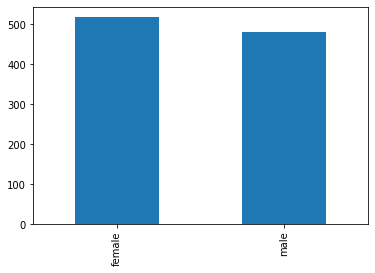

In [158]:
df_ed['gender'].value_counts().plot(kind = 'bar')

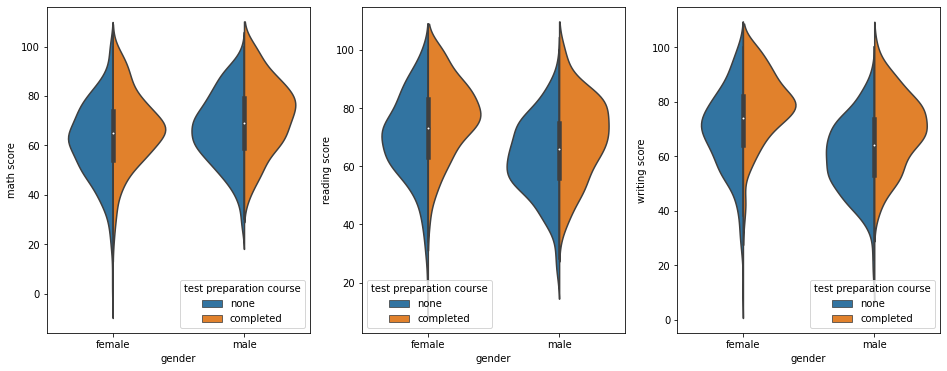

In [159]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 6)

sns.violinplot(x = 'gender', y = 'math score', hue = 'test preparation course',
              data = df_ed, split = True, ax = ax[0])
sns.violinplot(x = 'gender', y = 'reading score', hue = 'test preparation course',
              data = df_ed, split = True, ax = ax[1])
sns.violinplot(x = 'gender', y = 'writing score', hue = 'test preparation course',
              data = df_ed, split = True, ax = ax[2])

plt.show()

De estas gráficas podemos interpretar varias cosas:

- En matematicas, los la mayoría de varones obtienen una presentación entre 60 y 80 puntos, mientras que en las mujeres, esta puntuación parece ser ligeramente más baja. También, aunque la cantidad sea muy reducida, algunas mujeres obtienen puntuaciones entre o y 20, mientras que en los varones la puntuación más baja parece estar por encima de 20.

- En lecutra, las mujeres la mayoría de mujeres obienen puntuaciones cercanas a 80 puntos, mientras que la mayoría de hombres obtienen puntuaciones más cercanas a los 60-70 puntos.

- En escritura de nuevo la mayoría de mujeres parecen obtener calificaciones cercanas a 80 y en los hombres estas calificaciones son más bajas. 

- Los alumnos que han completado el curso de formación para el examen (independientemente del género) obtienen calificaciones más altas que los que no han preparado dicho curso.

C:\Users\kmart\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kmart\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
C:\Users\kmart\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kmart\AppDat

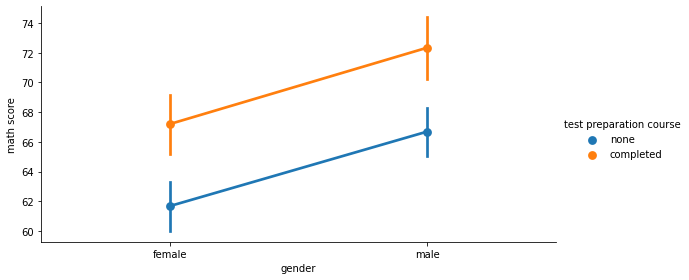

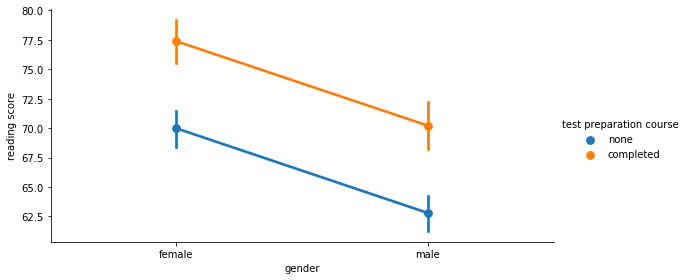

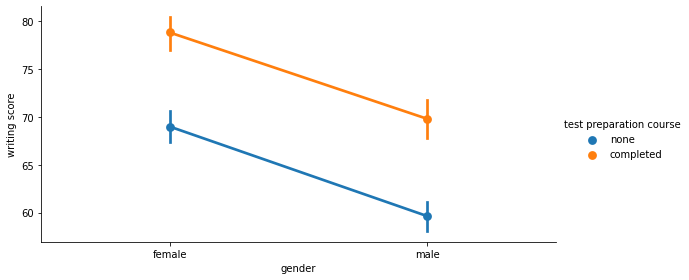

In [160]:
sns.factorplot(x = "gender", y = "math score", hue = 'test preparation course', kind = 'point', 
               height = 4, aspect = 2, legend = True, data = df_ed, ax = ax[0])
sns.factorplot(x = "gender", y = "reading score", hue = 'test preparation course', kind = 'point', 
               height = 4, aspect = 2, legend = True, data = df_ed, ax = ax[1])
sns.factorplot(x = "gender", y = "writing score", hue = 'test preparation course', kind = 'point', 
               height = 4, aspect = 2, legend = True, data = df_ed, ax = ax[2])
plt.show()

De nuevo, estas gráficas nos permiten ver cosas similares a las que vimos con los violinplots.

- Las calificaciones en matemáticas son más altas en los varones, pero las mujeres obtienen mayor puntuación en lectura y escritura.

- Existen diferencias notables entre los alumnos que se preparan los cursos, y los que no. En todas las asignaturas los alumnos que han pasado el curso de preparación obtienen mejores calificaciones que los que no lo han preparado.